Task 3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import zscore
import scipy
from scipy.stats import shapiro,chi2,normaltest,kstest

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report


In [97]:
df= pd.read_csv(r"C:\Users\ASUS\OneDrive\IT VEDANT CLASS\ML\intenship prodology\task 3\cleaned_data.csv ")

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.722722
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.722722
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.722722
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.722722
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0.722722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,2.058168
40996,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,2.058168
40997,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,2.058168
40998,44,technician,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,2.058168


In [98]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'zscore'],
      dtype='object')

In [99]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
zscore            0
dtype: int64

In [100]:
print(f"DATA TYPE \n{df.dtypes}")
print("*"*100)
print(f"shape of data \n{df.shape}")
print("*"*100)
print(f"DATA DESc \n{df.describe()}")
print("*"*100)
print(f"DATA info \n{df.info}")
print("*"*100)
print(f"DATA  \n{df.isnull()}")
print("*"*100)
print(f"/n DATA TYPE \n{df.isnull().sum()}")
print("*"*100)
print(f"DUPLICATE  \n{df.duplicated()}")
print(f" total DUPLICATE  \n {df.duplicated().sum()}")
print("*"*100)

DATA TYPE 
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                  object
zscore            float64
dtype: object
****************************************************************************************************
shape of data 
(41000, 20)
****************************************************************************************************
DATA DESc 
                age    pdays      previous  emp.var.rate  cons.price.idx  \
count  41000.000000  41000.0  41000.000000  41000.000000    41000.000000   
mean      53.900000    999.0      0.100000      0.000000       

In [101]:
## stats

In [102]:
def Cheching(data,col):
    mean = data[col].mean()
    median = data[col].median()
    mode=data[col].mode()
    var = data[col].var()
    std = data[col].std()
    skew = data[col].skew()

    analysis={ "median" :[median],
              "mean":[mean],
              "Var":[var],
              "Standard Deviation": [std],
              "SKEWNESS":[skew],
              "MODE":[mode],
             
             }
    
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color="lightgreen", fliersize=6, linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=14)

    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.50)
    q3=df[col].quantile(0.75)
    print(f"Q1={q1}")
    print(f"Q1={q2}")
    print(f"Q1={q3}")
    print("IQR = ",q3 - q1)

    
    return pd.DataFrame(analysis)



Q1=999.0
Q1=999.0
Q1=999.0
IQR =  0.0


,median,mean,Var,Standard Deviation,SKEWNESS,MODE
0,999.0,999.0,0.0,0.0,0.0,"0 999 Name: pdays, dtype: int64"


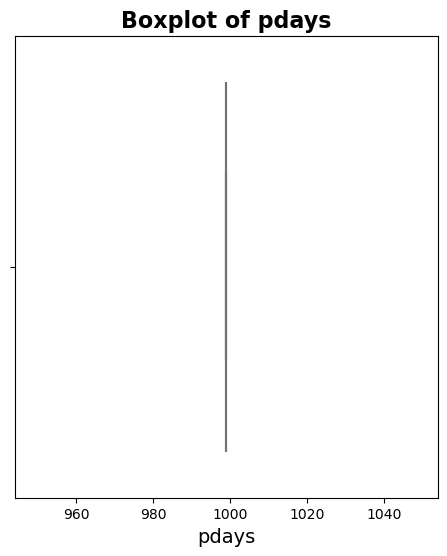

In [103]:
Cheching(df,"pdays")

In [104]:
## cheching outliers

In [108]:
def Cheching_outliers(data,numerical_columns):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_columns], color="lightgreen", fliersize=6, linewidth=1.5)
    plt.title(f"Boxplot of {numerical_columns}", fontsize=16, weight='bold')
    plt.xlabel(numerical_columns, fontsize=14)
numerical_columns = ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'zscore']


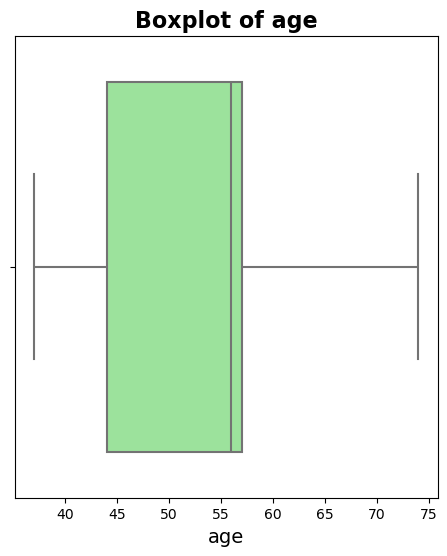

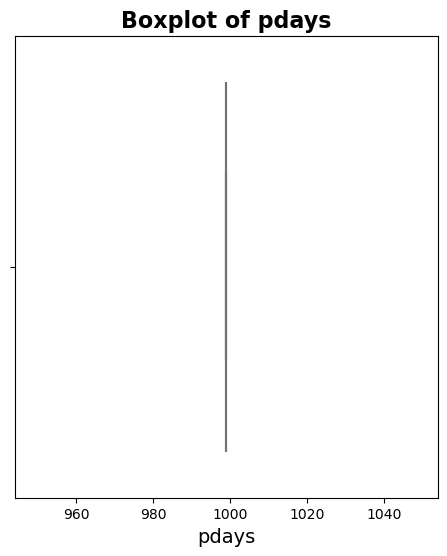

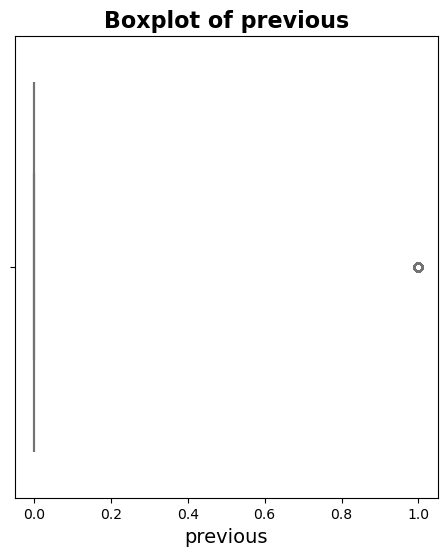

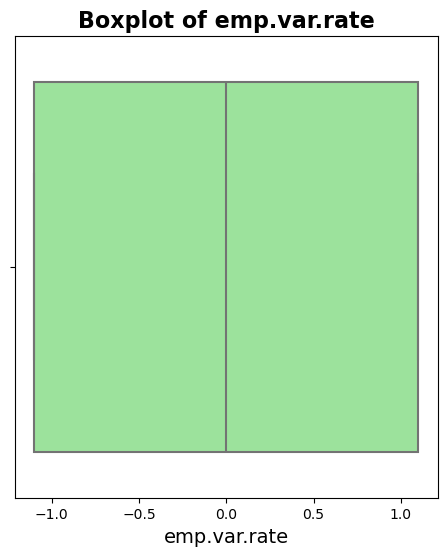

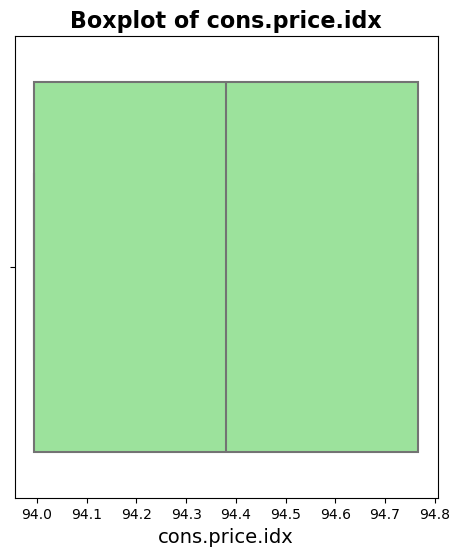

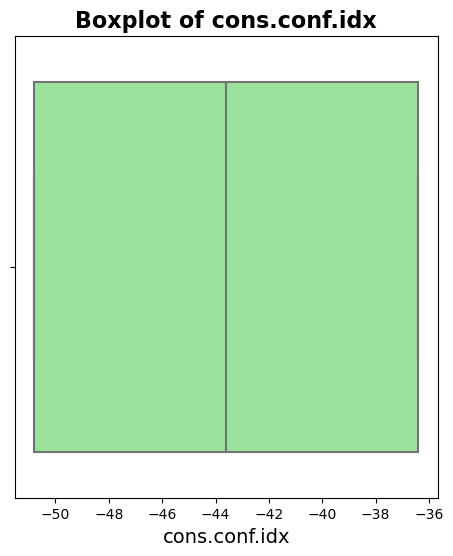

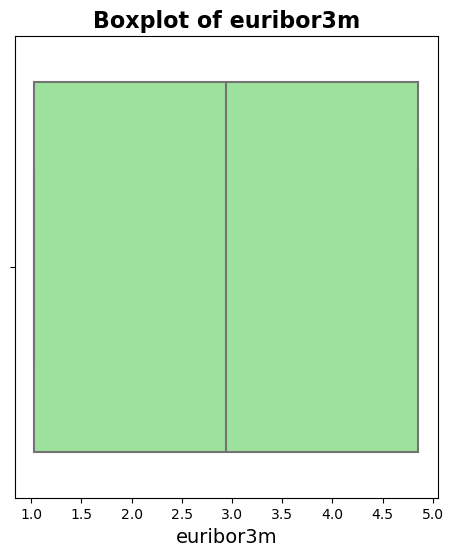

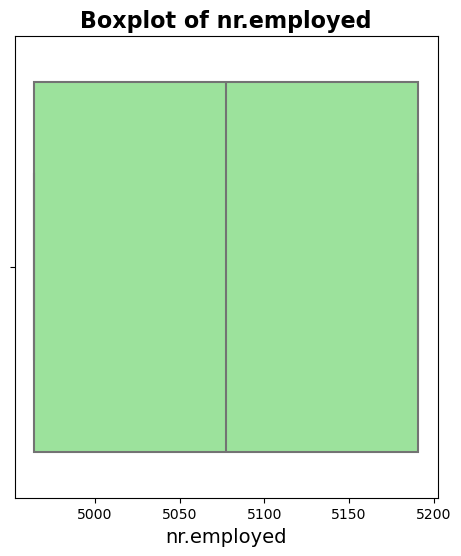

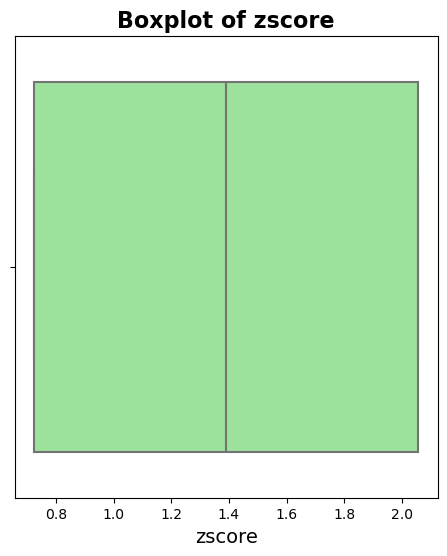

In [109]:
for i in numerical_columns :
     Cheching_outliers(df,i)


In [107]:
## handling outilers

In [110]:
def Handling_Outliers(data,col):
    print(f"{col} : Outliers Checking")
    sns.boxplot(df[col], color = "c")
    plt.show()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(f"IQR = {iqr}")
    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")
    print("******************************************************************************************************************************************************")
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    df.loc[(df[col] < LowerTail), col] = LowerTail
    df.loc[(df[col] > UpperTail), col] = UpperTail
    print("\nBoxplot After Handling of outliers:\n")
    sns.boxplot(df[col], color = "b")
    plt.show()

col = ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'zscore']



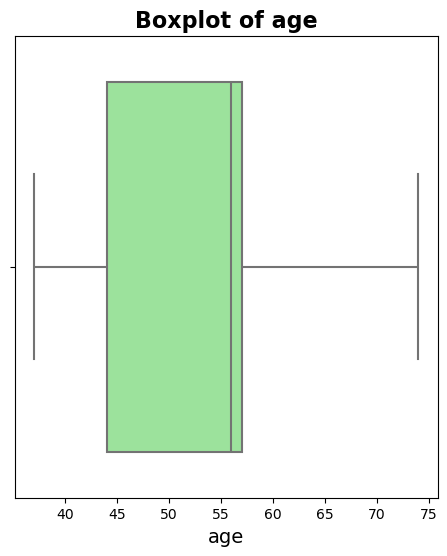

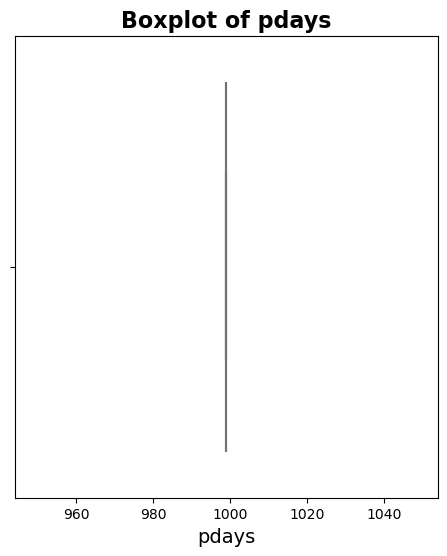

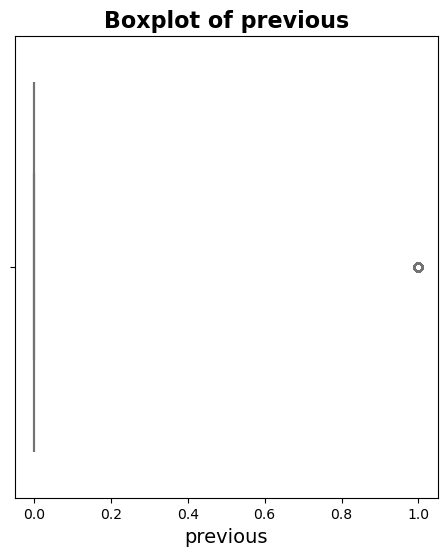

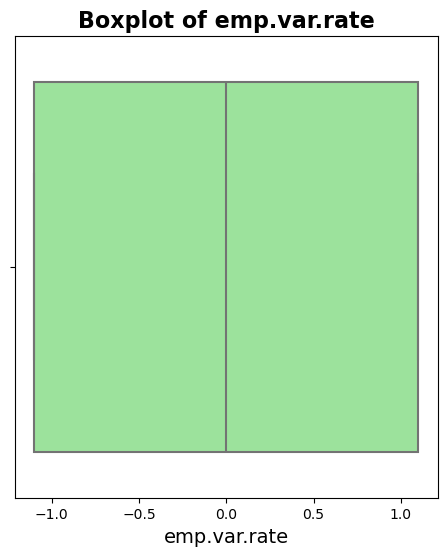

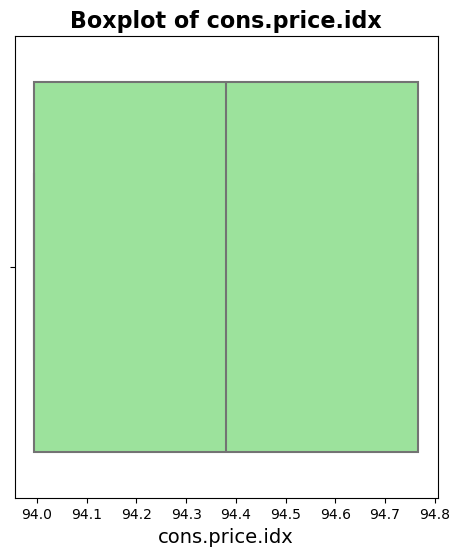

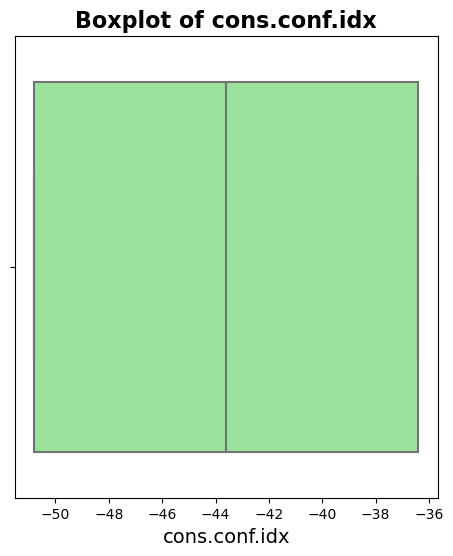

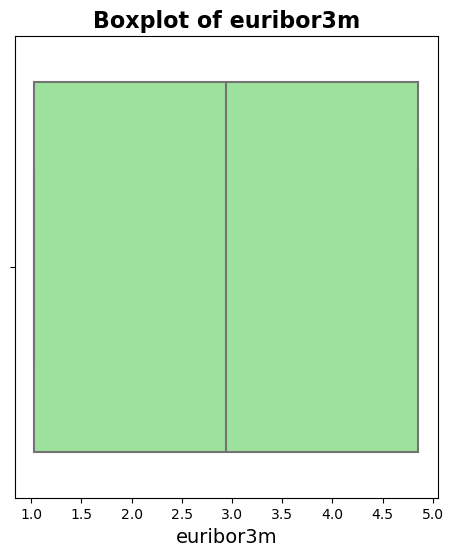

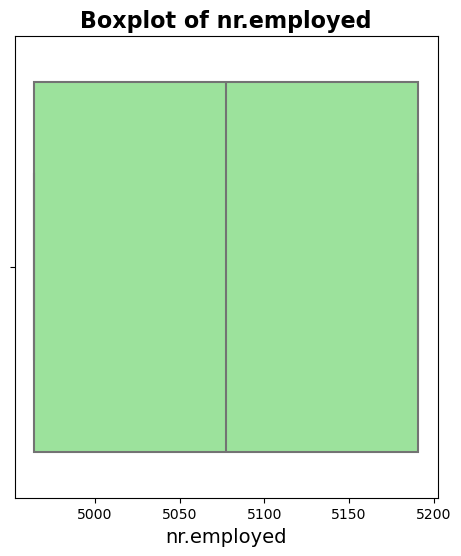

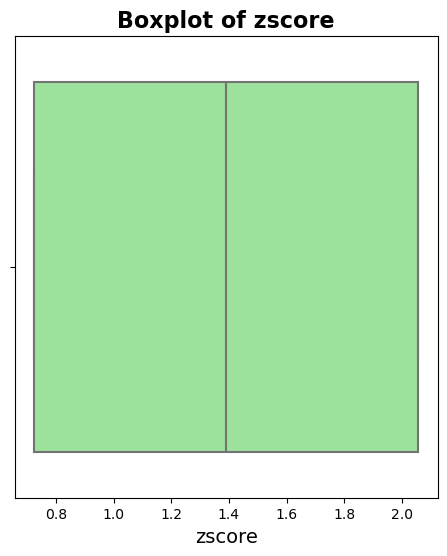

In [111]:
for i in col:
     Cheching_outliers(df,i)


In [15]:
## Checking Z score

In [112]:
df["zscore"]=scipy.stats.zscore(df["cons.price.idx"])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,zscore
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40995,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,1.0
40996,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,1.0
40997,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no,1.0
40998,44,technician,married,professional.course,no,no,no,cellular,nov,fri,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes,1.0


In [113]:
x = df.drop(columns=["y","zscore"])# Features
y = df['y']  # Target variable

In [114]:
# Splitting into 80% train and 20% test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Set Size:", Xtrain.shape)
print("Testing Set Size:", Xtest.shape)


Training Set Size: (32800, 18)
Testing Set Size: (8200, 18)


In [115]:
vif_df = pd.DataFrame()
vif_df["Features"] = x.columns
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# Output the shapes of the split data
print("Training features shape:", xtrain.shape)
print("Testing features shape:", xtest.shape)
print("Training target shape:", ytrain.shape)
print("Testing target shape:", ytest.shape)

Training features shape: (32800, 18)
Testing features shape: (8200, 18)
Training target shape: (32800,)
Testing target shape: (8200,)


In [117]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41000 non-null  int64  
 1   job             41000 non-null  object 
 2   marital         41000 non-null  object 
 3   education       41000 non-null  object 
 4   default         41000 non-null  object 
 5   housing         41000 non-null  object 
 6   loan            41000 non-null  object 
 7   contact         41000 non-null  object 
 8   month           41000 non-null  object 
 9   day_of_week     41000 non-null  object 
 10  pdays           41000 non-null  int64  
 11  previous        41000 non-null  int64  
 12  poutcome        41000 non-null  object 
 13  emp.var.rate    41000 non-null  float64
 14  cons.price.idx  41000 non-null  float64
 15  cons.conf.idx   41000 non-null  float64
 16  euribor3m       41000 non-null  float64
 17  nr.employed     41000 non-null 

## model Traning 

In [120]:
dt_clf = DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier()

In [128]:
dt_clf = DecisionTreeClassifier()
dt_clf_model = dt_clf.fit(xtrain,ytrain)
dt_clf_model


DecisionTreeClassifier()

In [138]:
print("Columns in xtrain:", xtrain.columns.tolist())
print("Expected categorical columns:", categorical_cols)


Columns in xtrain: ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_housemaid', 'job_retired', 'job_services', 'job_technician', 'education_basic.6y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'default_unknown', 'housing_yes', 'loan_yes', 'contact_telephone', 'month_nov', 'day_of_week_mon', 'poutcome_nonexistent']
Expected categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [139]:
# Find the intersection of expected categorical columns and actual xtrain columns
available_categorical_cols = list(set(categorical_cols) & set(xtrain.columns))

# Check if there are categorical columns to encode
if available_categorical_cols:
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Fit on training data
    xtrain_encoded = encoder.fit_transform(xtrain[available_categorical_cols])
    xtest_encoded = encoder.transform(xtest[available_categorical_cols])

    # Convert to DataFrame with proper feature names
    xtrain_encoded_df = pd.DataFrame(xtrain_encoded, columns=encoder.get_feature_names_out(available_categorical_cols))
    xtest_encoded_df = pd.DataFrame(xtest_encoded, columns=encoder.get_feature_names_out(available_categorical_cols))

    # Drop original categorical columns
    xtrain = xtrain.drop(columns=available_categorical_cols).reset_index(drop=True)
    xtest = xtest.drop(columns=available_categorical_cols).reset_index(drop=True)

    # Merge encoded columns
    xtrain = pd.concat([xtrain, xtrain_encoded_df], axis=1)
    xtest = pd.concat([xtest, xtest_encoded_df], axis=1)

    # Ensure xtrain and xtest have same columns
    xtrain, xtest = xtrain.align(xtest, join='left', axis=1, fill_value=0)
else:
    print("⚠️ Warning: No categorical columns found for encoding!")


⚠️ Warning: No categorical columns found for encoding!


In [146]:

# Define the correct target column
target_column = "y"  # Change this if the actual target column has a different name

# Check if target column exists
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset!")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column from categorical_cols if it's there
if target_column in categorical_cols:
    categorical_cols.remove(target_column)

# Print column categories
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values

# Define features (X) and target (y)
X = df.drop(columns=[target_column])  # Ensure target column exists before dropping
y = df[target_column]

# Apply OneHotEncoding for categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Ensure categorical columns exist in X before encoding
existing_categorical_cols = [col for col in categorical_cols if col in X.columns]

# Apply encoding only to existing categorical columns
X_encoded = encoder.fit_transform(X[existing_categorical_cols])

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(existing_categorical_cols))

# Drop original categorical columns and merge encoded data
X = X.drop(columns=existing_categorical_cols).reset_index(drop=True)
X = pd.concat([X, X_encoded_df], axis=1)

# Split into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(xtrain, ytrain)

# Predictions
ytrain_pred = dt_clf.predict(xtrain)
ytest_pred = dt_clf.predict(xtest)

# Model Evaluation
print("\n🔹 Model Evaluation on Training Data:")
print("Accuracy:", accuracy_score(ytrain, ytrain_pred))
print(classification_report(ytrain, ytrain_pred))

print("\n🔹 Model Evaluation on Test Data:")
print("Accuracy:", accuracy_score(ytest, ytest_pred))
print(classification_report(ytest, ytest_pred))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(ytest, ytest_pred))



Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical Columns: ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'zscore']

🔹 Model Evaluation on Training Data:
Accuracy: 1.0
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     26240
         yes       1.00      1.00      1.00      6560

    accuracy                           1.00     32800
   macro avg       1.00      1.00      1.00     32800
weighted avg       1.00      1.00      1.00     32800


🔹 Model Evaluation on Test Data:
Accuracy: 1.0
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      6560
         yes       1.00      1.00      1.00      1640

    accuracy                           1.00      8200
   macro avg       1.00      1.00      1.00      8200
weighted avg       1.00      1.00